In [9]:
pip install xlrd


  Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 92.2/96.5 kB 871.5 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 791.7 kB/s eta 0:00:00


# Reading the dataset

In [18]:
import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns
# importing and assigning dataset

df = pd.read_csv("D:\\UnnutiCollege\\project\\ambi_dataset.csv")
df.head()

,id,word,bigram1,bigram2,bigram2prob,trigram1,trigram1prob,trigram2,trigram2prob,posplus1,...,posminus3,gram4_1,gram4_1prob,sentenceID,fileid,gram4_2,gram4_2prob,sentence,bigram1prob,sence
0,75025,अंक,इस अंक,अंक के,0.500000,कि इस अंक,0.090909,अंक के लेखों,1.0,PSP,...,VAUX,हैं कि इस अंक,1.0,147,31,अंक के लेखों की,1.0,उम्मीद करते हैं कि इस अंक के लेखों की जानकारिय...,0.003317,अंक2
1,74999,अंक,प्रस्तुत अंक,अंक को,1.000000,के प्रस्तुत अंक,1.000000,अंक को ऐसी,1.0,PSP,...,NN,फूल के प्रस्तुत अंक,1.0,145,31,अंक को ऐसी जानकारियों,1.0,फल फूल के प्रस्तुत अंक को ऐसी जानकारियों से सम...,0.250000,अंक1
2,59681,अंकित,पर अंकित,अंकित लेबल,1.000000,उन पर अंकित,1.000000,अंकित लेबल या,1.0,NN,...,NN,जानकारी उन पर अंकित,1.0,140,11,अंकित लेबल या उनके,1.0,शाकनाशी रसायनों की जानकारी उन पर अंकित लेबल या...,0.005222,अंकित2
3,60500,अंकित,पर अंकित,अंकित लेबल,1.000000,उन पर अंकित,1.000000,अंकित लेबल या,1.0,NN,...,NN,जानकारी उन पर अंकित,1.0,139,12,अंकित लेबल या उनके,1.0,शाकनाशी रसायनों की जानकारी उन पर अंकित लेबल या...,0.005222,अंकित1
4,70656,अंकुरित,फलियां अंकुरित,अंकुरित नहीं,0.222222,भी फलियां अंकुरित,1.000000,अंकुरित नहीं होती,1.0,NEG,...,PSP,पर भी फलियां अंकुरित,1.0,114,26,अंकुरित नहीं होती हैं,1.0,इसमें लगभग 20-30 दिनों तक पानी मिलने पर भी फलि...,0.125000,अंकुरित1


# Analysing the dataset

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39963 entries, 0 to 39962
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   id            39963 non-null  int64
 1   word          39963 non-null  int32
 2   bigram1       39963 non-null  int32
 3   bigram2       39963 non-null  int32
 4   bigram2prob   39963 non-null  int64
 5   trigram1      39963 non-null  int32
 6   trigram1prob  39963 non-null  int64
 7   trigram2      39963 non-null  int32
 8   trigram2prob  39963 non-null  int64
 9   posplus1      39963 non-null  int32
 10  posminus1     39963 non-null  int32
 11  posplus2      39963 non-null  int32
 12  posminus2     39963 non-null  int32
 13  posplus3      39963 non-null  int32
 14  posminus3     39963 non-null  int32
 15  gram4_1       39963 non-null  int32
 16  gram4_1prob   39963 non-null  int64
 17  sentenceID    39963 non-null  int64
 18  fileid        39963 non-null  int64
 19  gram4_2       39963 non-n

In [6]:
col_list= df.columns
for i in col_list:
    print(i+ 'values \n')
    print(df[i].value_counts())

idvalues 

id
75025    1
54364    1
71768    1
60504    1
57433    1
        ..
65760    1
80608    1
83424    1
86497    1
87119    1
Name: count, Length: 39963, dtype: int64
wordvalues 

word
से            2104
और            1816
को            1463
लिए           1105
पर             997
              ... 
न्यू             1
नीली             1
नींव             1
निष्कासन         1
होशियारपुर       1
Name: count, Length: 2598, dtype: int64
bigram1values 

bigram1
के लिए           1058
जा सकता           239
के बाद            218
है और             181
के कारण           160
                 ... 
दोनों तरीकों        1
समुद्र तल           1
डालकर तलिए          1
ही तलिए             1
और होशियारपुर       1
Name: count, Length: 17004, dtype: int64
bigram2values 

bigram2
होती है                 362
चाहिए </s>              359
सकता है                 320
करें </s>               301
करने के                 188
                       ... 
तालाब भूमिगत              1
तालाब लगभग                1
ता

# Converting into category

In [20]:
#converting into category
conversion_list=['fileid','posminus3', 'posplus3', 'posminus2', 'posplus2', 'posminus1', 'posplus1']
for i in conversion_list:
    df[i]=df[i].astype('category')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39963 entries, 0 to 39962
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            39963 non-null  int64   
 1   word          39963 non-null  object  
 2   bigram1       39963 non-null  object  
 3   bigram2       39963 non-null  object  
 4   bigram2prob   39963 non-null  float64 
 5   trigram1      39963 non-null  object  
 6   trigram1prob  39963 non-null  float64 
 7   trigram2      39963 non-null  object  
 8   trigram2prob  39963 non-null  float64 
 9   posplus1      39963 non-null  category
 10  posminus1     39963 non-null  category
 11  posplus2      39963 non-null  category
 12  posminus2     39963 non-null  category
 13  posplus3      39963 non-null  category
 14  posminus3     39963 non-null  category
 15  gram4_1       39963 non-null  object  
 16  gram4_1prob   39963 non-null  float64 
 17  sentenceID    39963 non-null  int64   
 18  fileid

In [7]:
df.head()

,id,word,bigram1,bigram2,bigram2prob,trigram1,trigram1prob,trigram2,trigram2prob,posplus1,...,posminus3,gram4_1,gram4_1prob,sentenceID,fileid,gram4_2,gram4_2prob,sentence,bigram1prob,sence
0,75025,अंक,इस अंक,अंक के,0.500000,कि इस अंक,0.090909,अंक के लेखों,1.0,PSP,...,VAUX,हैं कि इस अंक,1.0,147,31,अंक के लेखों की,1.0,उम्मीद करते हैं कि इस अंक के लेखों की जानकारिय...,0.003317,अंक2
1,74999,अंक,प्रस्तुत अंक,अंक को,1.000000,के प्रस्तुत अंक,1.000000,अंक को ऐसी,1.0,PSP,...,NN,फूल के प्रस्तुत अंक,1.0,145,31,अंक को ऐसी जानकारियों,1.0,फल फूल के प्रस्तुत अंक को ऐसी जानकारियों से सम...,0.250000,अंक1
2,59681,अंकित,पर अंकित,अंकित लेबल,1.000000,उन पर अंकित,1.000000,अंकित लेबल या,1.0,NN,...,NN,जानकारी उन पर अंकित,1.0,140,11,अंकित लेबल या उनके,1.0,शाकनाशी रसायनों की जानकारी उन पर अंकित लेबल या...,0.005222,अंकित2
3,60500,अंकित,पर अंकित,अंकित लेबल,1.000000,उन पर अंकित,1.000000,अंकित लेबल या,1.0,NN,...,NN,जानकारी उन पर अंकित,1.0,139,12,अंकित लेबल या उनके,1.0,शाकनाशी रसायनों की जानकारी उन पर अंकित लेबल या...,0.005222,अंकित1
4,70656,अंकुरित,फलियां अंकुरित,अंकुरित नहीं,0.222222,भी फलियां अंकुरित,1.000000,अंकुरित नहीं होती,1.0,NEG,...,PSP,पर भी फलियां अंकुरित,1.0,114,26,अंकुरित नहीं होती हैं,1.0,इसमें लगभग 20-30 दिनों तक पानी मिलने पर भी फलि...,0.125000,अंकुरित1


## Categorical columns

In [20]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [21]:
print(categorical_columns)

Index(['word', 'bigram1', 'bigram2', 'trigram1', 'trigram2', 'posplus1',
       'posminus1', 'posplus2', 'posminus2', 'posplus3', 'posminus3',
       'gram4_1', 'gram4_2', 'sentence', 'sence'],
      dtype='object')


# Encoding the Dataset

In [22]:
#encoding our dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for column in df:
    df[column] = encoder.fit_transform(df[column])


In [23]:
df

,id,word,bigram1,bigram2,bigram2prob,trigram1,trigram1prob,trigram2,trigram2prob,posplus1,...,posminus3,gram4_1,gram4_1prob,sentenceID,fileid,gram4_2,gram4_2prob,sentence,bigram1prob,sence
0,27720,0,2054,0,3648,7669,570,0,578,10,...,18,31437,222,147,29,0,175,1573,2033,1
1,27694,0,10642,1,3768,9600,817,1,578,10,...,8,21760,222,145,29,1,175,3481,3579,0
2,12376,1,9247,2,3768,4879,817,2,578,6,...,8,16231,222,140,10,2,175,4974,2344,3
3,13195,1,9247,2,3768,4879,817,2,578,6,...,8,16231,222,139,11,2,175,4974,2344,2
4,23351,2,10823,4,3490,19431,817,4,578,5,...,12,19281,222,114,24,4,175,1222,3436,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39958,28977,2596,7231,16496,3364,12105,817,26117,184,10,...,12,9692,222,110,31,29301,175,290,3740,39941
39959,33330,2596,16346,16495,3375,22745,551,26088,382,10,...,3,8707,158,83,36,29269,126,3535,2512,39760
39960,14899,2596,2836,16495,3375,13895,817,26088,382,10,...,0,3872,0,95,13,29269,126,2820,3413,39830
39961,14134,2596,16346,16494,3237,25717,644,26070,376,10,...,8,19402,178,150,12,29249,175,1068,2512,39855


In [24]:
df.dtypes

id              int64
word            int32
bigram1         int32
bigram2         int32
bigram2prob     int64
trigram1        int32
trigram1prob    int64
trigram2        int32
trigram2prob    int64
posplus1        int32
posminus1       int32
posplus2        int32
posminus2       int32
posplus3        int32
posminus3       int32
gram4_1         int32
gram4_1prob     int64
sentenceID      int64
fileid          int64
gram4_2         int32
gram4_2prob     int64
sentence        int32
bigram1prob     int64
sence           int32
dtype: object

In [15]:
df["word"].unique()

array([   0,    1,    2, ..., 2595, 2596, 2597])

In [16]:
df["word"].value_counts()

word
2486    2104
300     1816
476     1463
2122    1105
1303     997
        ... 
1244       1
1242       1
1236       1
1235       1
2597       1
Name: count, Length: 2598, dtype: int64

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Support Vector Classifier (SVC) using scaled data
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled testing data
accuracy = svm_classifier.score(X_test_scaled, y_test)
print(f"Accuracy with feature scaling: {accuracy:.2f}")


Accuracy with feature scaling: 0.83


# Naive Bayes Classifier

[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1 0 0 2 2 2 2 2 1 2 1]
Gaussian Naive Bayes model accuracy(in %): 95.0
[[19  0  0]
 [ 0 19  2]
 [ 0  1 19]]


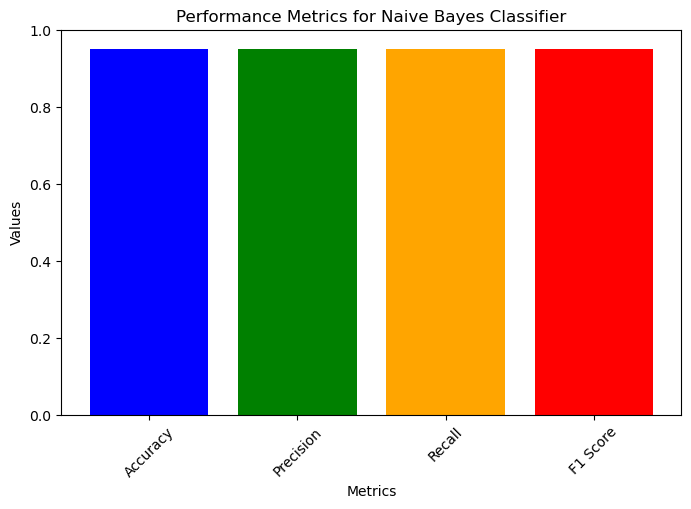

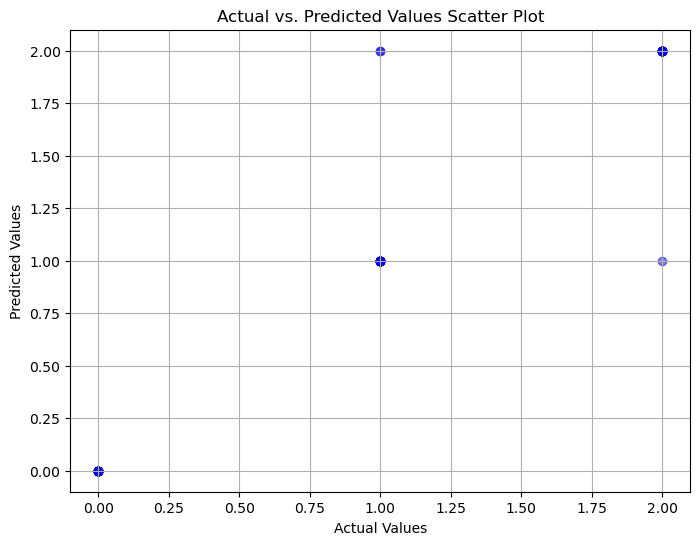

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
df = pd.read_csv('D:\\UnnutiCollege\\project\\ambi_dataset.csv')


#converting into categories
conversion_list=['fileid','posminus3', 'posplus3', 'posminus2', 'posplus2', 'posminus1', 'posplus1']
for i in conversion_list:
    df[i]=df[i].astype('category')

categorical_columns = df.select_dtypes(include=['object']).columns

#encoding the dataset
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df:
    df[column] = encoder.fit_transform(df[column])


from sklearn.datasets import load_iris
iris = load_iris()
   
data = df.iloc[:,0:22]
target = df.sence

# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target
   
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
   
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
   
# making predictions on the testing set
y_pred = gnb.predict(X_test)
print(y_pred)
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot the bar graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics for Naive Bayes Classifier')
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better visualization
plt.xticks(rotation=45)
plt.show()


#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values Scatter Plot')
plt.grid(True)
plt.show()

#from sklearn.metrics import confusion_matrix  
#import seaborn as sns
#labels = ["Fully Paid", "Not fully Paid"]
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
#disp.plot();

# Support Vector Classifier

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


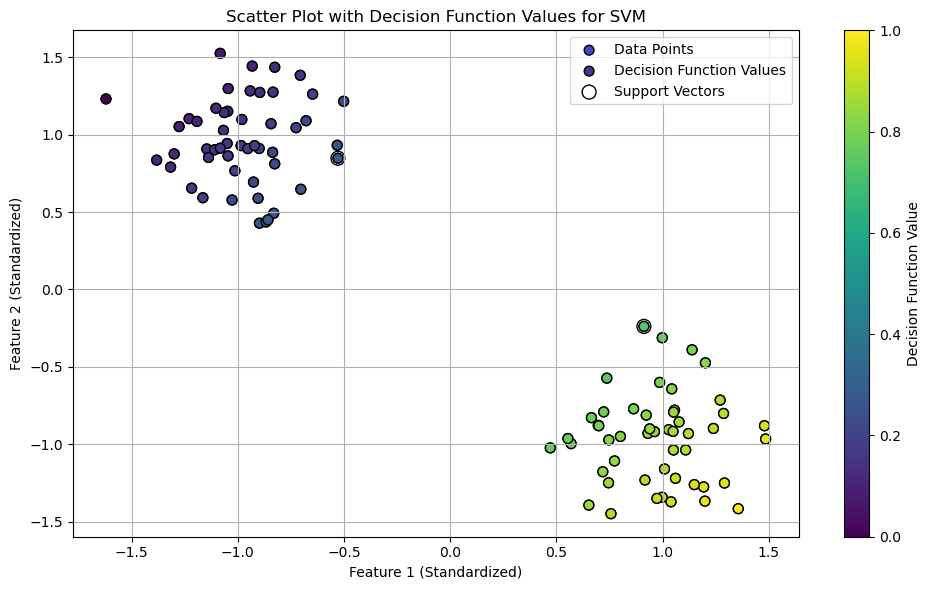

In [44]:
# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the iris dataset (you can replace this with your own dataset)
df = pd.read_csv('D:\\UnnutiCollege\\project\\ambi_dataset.csv')

conversion_list=['fileid','posminus3', 'posplus3', 'posminus2', 'posplus2', 'posminus1', 'posplus1']
for i in conversion_list:
    df[i]=df[i].astype('category')

categorical_columns = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df:
    df[column] = encoder.fit_transform(df[column])


from sklearn.datasets import load_iris
iris = load_iris()

data = df.iloc[:,0:22]
target = df.sence

# store the feature matrix (X) and response vector (y)
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)

y_pred= classifier.predict(x_test) 
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Generate a synthetic dataset with 2 classes
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and train the Support Vector Classifier (SVC)
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_scaled, y)

# Obtain the decision function values for all data points
decision_values = svm_classifier.decision_function(X_scaled)

# Plot scatter plot with decision function values
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='coolwarm', edgecolors='k', marker='o', s=50, label='Data Points')

# Plot decision function values as color gradient
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=decision_values, cmap='viridis', edgecolors='k', marker='o', s=50, label='Decision Function Values')

# Plot support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('Scatter Plot with Decision Function Values for SVM')
plt.legend()
plt.grid(True)
plt.colorbar(label='Decision Function Value')
plt.tight_layout()
plt.show()




In [47]:

# Random Forest

# RandomForest

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


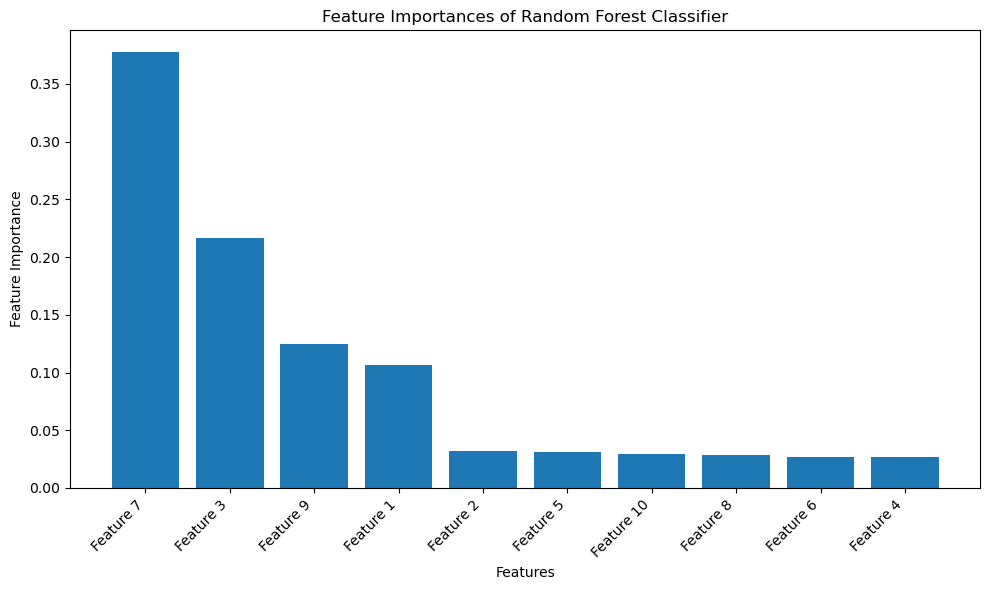

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the iris dataset (you can replace this with your own dataset)
df = pd.read_csv('D:\\UnnutiCollege\\project\\ambi_dataset.csv')

conversion_list=['fileid','posminus3', 'posplus3', 'posminus2', 'posplus2', 'posminus1', 'posplus1']
for i in conversion_list:
    df[i]=df[i].astype('category')

categorical_columns = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in df:
    df[column] = encoder.fit_transform(df[column])


from sklearn.datasets import load_iris
iris = load_iris()

data = df.iloc[:,0:22]
target = df.sence

# store the feature matrix (X) and response vector (y)
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train) 

y_pred= classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

#plot a graph
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [f"Feature {i+1}" for i in sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), sorted_features, rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of Random Forest Classifier')
plt.tight_layout()
plt.show()
